In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts')

In [4]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image
from captum.attr import visualization as viz
from matplotlib.colors import LinearSegmentedColormap
import cv2
from copy import copy 
import itertools
import json
import argparse 

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [6]:
from src.images import *
from src.util import *
from src.models import *
from src.plot import *

In [43]:
# parser = argparse.ArgumentParser(description="Your script description here")

# # Add command-line arguments
# parser.add_argument('--num_objects', type=int, default=2, help='Number of objects')
# parser.add_argument('--noisy', action='store_true', help='Enable noisy')
# parser.add_argument('--weight_decay', type=float, default=0.0004, help='Weight decay value')
# parser.add_argument('--encoder_model', type=str, default='inceptionv3', help='Encoder model')
# parser.add_argument('--optimizer', type=str, default='sgd', help='Optimizer')
# parser.add_argument('--seed', type=int, default=42, help='Random seed')

# # Parse the command-line arguments
# args = parser.parse_args()

# # Now you can access the variables using args.num_objects, args.noisy, etc.
# num_objects = args.num_objects
# noisy = args.noisy
# weight_decay = args.weight_decay
# encoder_model = args.encoder_model
# optimizer = args.optimizer
# seed = args.seed

num_objects = 1
noisy=False
weight_decay = 0.004
encoder_model='mlp_mask_1e-06'
optimizer = 'sgd'
seed = 42

results_folder = "results/synthetic/objects={}_noisy={}_wd={}_model={}_optimizer={}_seed={}".format(
    num_objects,noisy,weight_decay,encoder_model,optimizer,seed
)

if not os.path.exists(results_folder):
    os.makedirs(results_folder)

In [44]:
np.random.seed(seed)
torch.manual_seed(seed)

In [45]:
train_loader, val_loader, train_pkl, val_pkl = get_data(num_objects, noisy,encoder_model=encoder_model)
val_images, val_y, val_c = unroll_data(val_loader)

In [46]:
joint_model = get_synthetic_model(num_objects,encoder_model,noisy,weight_decay,optimizer,seed)

## Analyze Masks

In [47]:
mask = joint_model.first_model.mask_generators[0].forward(torch.stack([val_images[0],val_images[1]]))

In [48]:
mask = mask.detach().numpy()

In [49]:
np.min(mask[0]), np.max(mask[0])

(0.060702927, 0.06803965)

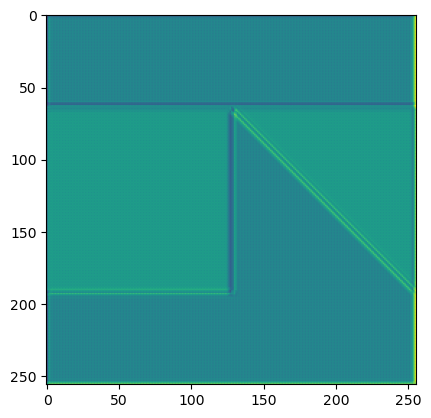

In [37]:
plt.imshow(mask[0].transpose((1,2,0)))